In [182]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn') # matplotlib 테마

In [183]:
dat = pd.read_csv("Mall_Customers.csv", encoding="UTF8")
print(dat.info())
dat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 1. EDA and Preprocessing

In [184]:
dat.drop('CustomerID', axis='columns', inplace = True) # index의 역할을 하는 CustomerID는 지워준다.
dat.rename(columns={'Annual Income (k$)':'Annual_Income',
                   'Spending Score (1-100)':'Spending_Score'}, inplace=True)

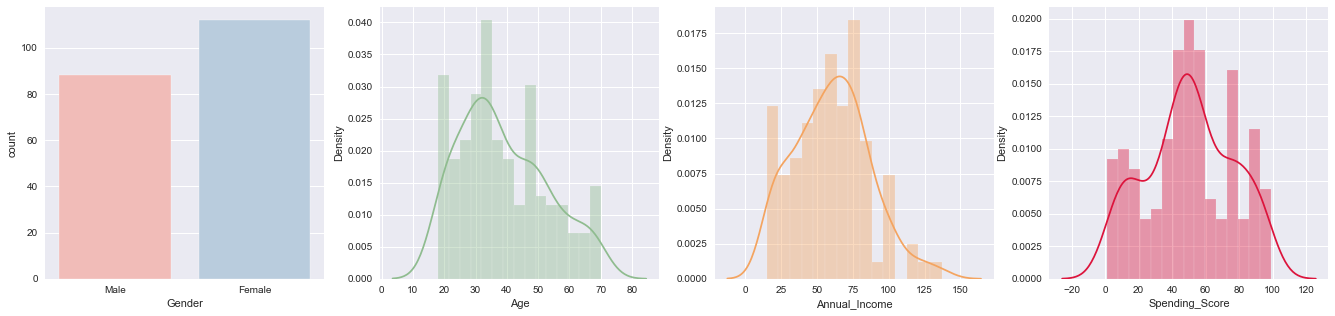

In [185]:
f, axes = plt.subplots(ncols=4, nrows=1, figsize=(23, 5))
sns.countplot(x = 'Gender',data = dat, ax = axes[0], palette = 'Pastel1')
sns.distplot(dat['Age'], ax = axes[1], color = 'darkseagreen', bins=15)
sns.distplot(dat["Annual_Income"], ax = axes[2], color = 'sandybrown', bins=15)
sns.distplot(dat["Spending_Score"], ax = axes[3], color = 'crimson', bins=15)
plt.show()

Variable|Note
:-|:-
Gender|여성 고객이 소폭 더 많다.
Age|30대 초반의 사람들이 가장 많다.
Annual Income|$75,000 정도의 연봉을 가진 사람들이 많다.
Spending Score|소비 점수는 약 50점을 가지는 고객이 많다.

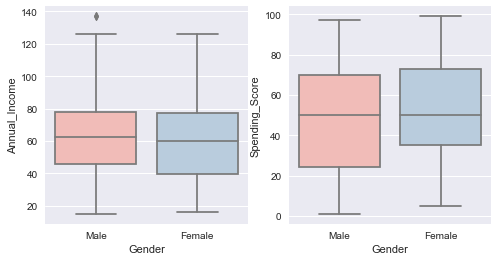

In [186]:
f, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))
sns.boxplot(x = 'Gender',y="Annual_Income", data = dat, ax = axes[0], palette = 'Pastel1')
sns.boxplot(x = 'Gender',y="Spending_Score", data = dat, ax = axes[1], palette = 'Pastel1')
plt.show()

- 남성과 여성간 연봉의 격차는 두드러지지 않는다.
- 여성의 소비점수가 남성보다 소폭 높다.

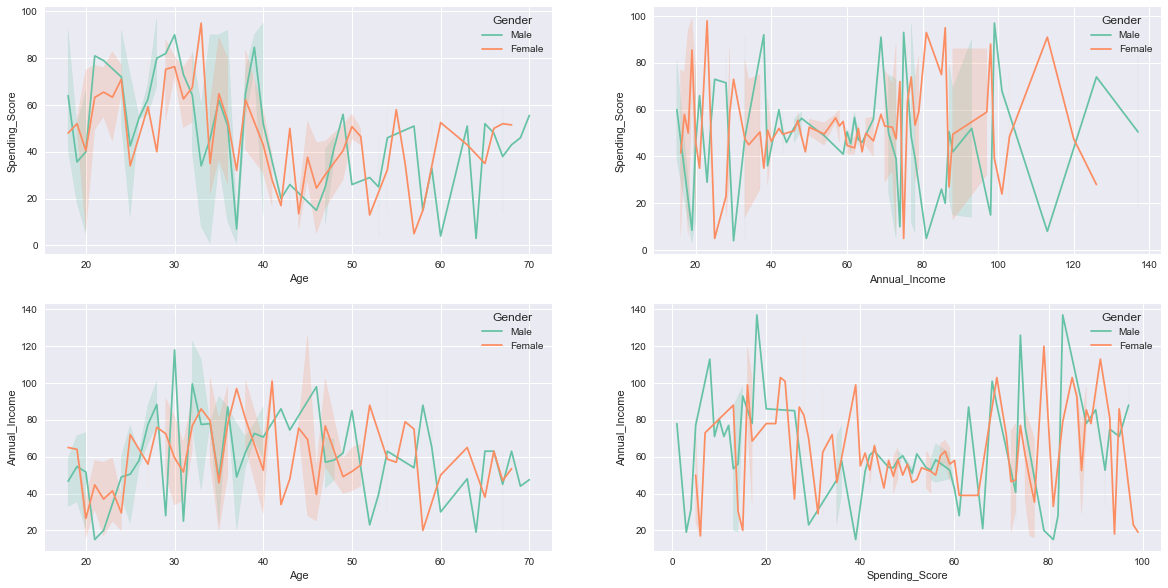

In [187]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
pal = 'Set2'
sns.lineplot(x = dat['Age'],y=dat["Spending_Score"], ax = axes[0][0], palette = pal, hue = dat['Gender'])
sns.lineplot(x = dat["Annual_Income"], y=dat["Spending_Score"], ax = axes[0][1], palette = pal, hue = dat['Gender'])
sns.lineplot(x = dat['Age'],y=dat["Annual_Income"], ax = axes[1][0], palette = pal, hue = dat['Gender'])
sns.lineplot(x = dat["Spending_Score"], y=dat["Annual_Income"], ax = axes[1][1], palette = pal, hue = dat['Gender'])
plt.show()

- `Age` vs `Spending Score`: 20대 초, 30대 초, 30대 후반에 소비점수가 가장 높게 나타나며, 40대 이후에는 소비점수가 40근방 혹은 아래를 유지한다. 남성과 여성의 경향성 차이는 크지 않아 보인다.
- `Annual Income` vs `Spending Score`: $40,000~ $60,000 구간은 소비점수가 50점대로 평탄한 것에 반해 그 외의 구간들은 들쭉날쭉하다.
- `Age` vs `Annual Income`: 30대~40대 때 연봉이 높아졌다가 나이가 듦에 따라 연봉이 조금씩 떨어진다.
- `Spending Score` vs `Annual Income`: 소비점수가 40~60점인 구간은 평탄한 것에 반해 그 외의 구간은 들쭉날쭉하다.

Text(0.5, 1.0, 'Correlation Factors Heat Map')

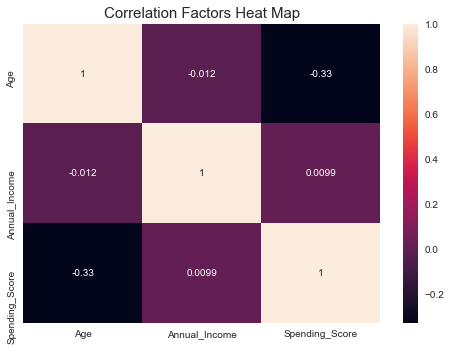

In [188]:
sns.heatmap(dat.corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')

변수들 사이의 상관관계는 뚜렷히 드러나지 않는다.

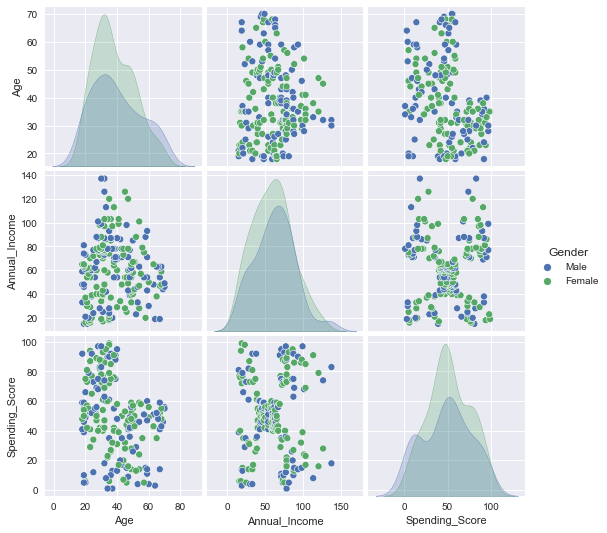

In [189]:
sns.pairplot(dat[dat.columns], diag_kind="kde", hue = "Gender")

`Annual Income` 과 `Spending Score`의 그래프에서 군집이 나타나는 것처럼 보인다.

In [190]:
dat['Gender'] = dat.Gender.map({'Male': 0, 'Female': 1}) # Categorical Feature를 바꿔준다.
dat.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## 2. Clustering

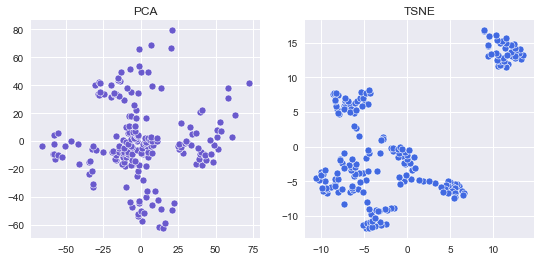

In [191]:
from sklearn.decomposition import PCA as PCA
from sklearn.manifold import TSNE

f, axes = plt.subplots(ncols=2, figsize=(9, 4))

pca = PCA(n_components=2)
pca.fit(dat)
Xpca = pca.transform(dat)
sns.scatterplot(Xpca[:,0],Xpca[:,1], ax = axes[0], color = 'slateblue')
axes[0].set_title('PCA')

tsn = TSNE()
res_tsne = tsn.fit_transform(dat)
sns.scatterplot(res_tsne[:,0],res_tsne[:,1], ax = axes[1], color = 'royalblue')
axes[1].set_title('TSNE')

plt.show()

Scaler를 적용하지 않은 데이터셋에 대해 PCA와 TSNE를 이용하여 차원을 축소한 후 시각화하였다.
1. PCA를 적용한 경우는 pairplot에서 `Annual Income` 과 `Spending Score`의 그래프와 비슷한 양상을 띄었다. 이는 데이터들의 특징을 가장 잘 반영하는 두 축이  `Annual Income` 과 `Spending Score`임을 알 수 있다.
2. TSNE를 적용한 경우는 하나의 클러스터가 확연히 분리되어 있음을 볼 수 있다. 

### (1) K-Means Clustering

In [192]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_val = [] #k의 변화에 따른 inertia 저장
sil_val = [] #k의 변화에 따른 silhouette score 저장
k_range = range(2, 20)
for K in k_range:
    model = KMeans(n_clusters = K, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    pred = model.fit_predict(dat)
    inertia_val.append(model.inertia_)
    silhouette_avg = silhouette_score(dat, pred)
    sil_val.append(silhouette_avg)
    print('k: %02d\t\t Inertia: %.3f\t Silhouette: %.3f'%(K, model.inertia_, silhouette_avg))

k: 02		 Inertia: 212889.442	 Silhouette: 0.293
k: 03		 Inertia: 143391.592	 Silhouette: 0.384
k: 04		 Inertia: 104414.675	 Silhouette: 0.405
k: 05		 Inertia: 75399.615	 Silhouette: 0.444
k: 06		 Inertia: 58348.641	 Silhouette: 0.452
k: 07		 Inertia: 51132.703	 Silhouette: 0.441
k: 08		 Inertia: 44392.116	 Silhouette: 0.428
k: 09		 Inertia: 41000.874	 Silhouette: 0.401
k: 10		 Inertia: 37649.692	 Silhouette: 0.379
k: 11		 Inertia: 34665.087	 Silhouette: 0.377
k: 12		 Inertia: 31659.187	 Silhouette: 0.356
k: 13		 Inertia: 29388.613	 Silhouette: 0.346
k: 14		 Inertia: 28170.631	 Silhouette: 0.348
k: 15		 Inertia: 26470.480	 Silhouette: 0.344
k: 16		 Inertia: 24712.860	 Silhouette: 0.328
k: 17		 Inertia: 23769.680	 Silhouette: 0.339
k: 18		 Inertia: 22830.864	 Silhouette: 0.339
k: 19		 Inertia: 20917.416	 Silhouette: 0.360


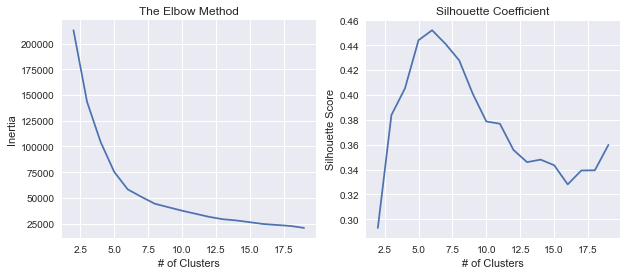

In [316]:
f, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
sns.lineplot(x = k_range, y = inertia_val, ax =  axes[0])
sns.lineplot(x = k_range, y = sil_val, ax = axes[1])

axes[0].set_xlabel('# of Clusters')
axes[1].set_xlabel('# of Clusters')

axes[0].set_ylabel('Inertia')
axes[1].set_ylabel('Silhouette Score')

axes[0].set_title('The Elbow Method')
axes[1].set_title('Silhouette Coefficient')
plt.show()

Elbow Method와 Silhouette Coefficient모두 **k=6**일 때 군집화의 성능이 가장 좋은 것으로 나타난다.

In [194]:
best_kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
best_kmeans.fit(dat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

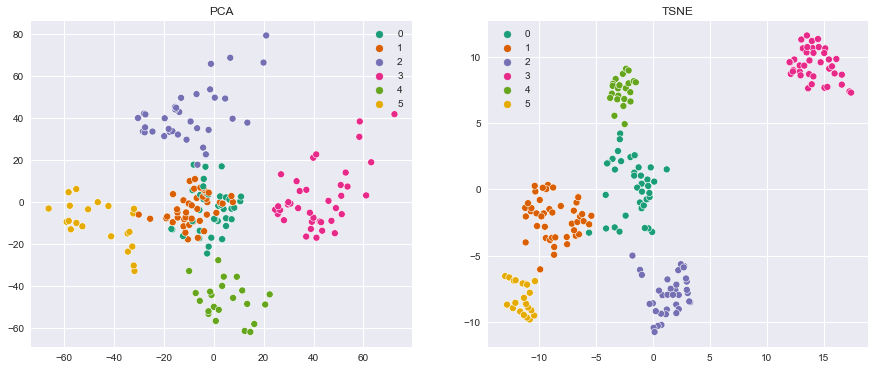

In [195]:
from sklearn.decomposition import PCA as PCA
from sklearn.manifold import TSNE
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

pca = PCA(n_components=2)
pca.fit(dat)
Xpca = pca.transform(dat)
sns.scatterplot(Xpca[:,0],Xpca[:,1], ax = axes[0], hue =best_kmeans.labels_, palette = 'Dark2')
axes[0].set_title('PCA')

tsn = TSNE()
res_tsne = tsn.fit_transform(dat)
sns.scatterplot(res_tsne[:,0],res_tsne[:,1], ax = axes[1], hue = best_kmeans.labels_, palette = 'Dark2')
axes[1].set_title('TSNE')

plt.show()

시각화한 결과, 클러스터링이 매우 잘 일어난 점을 확인할 수 있었다.

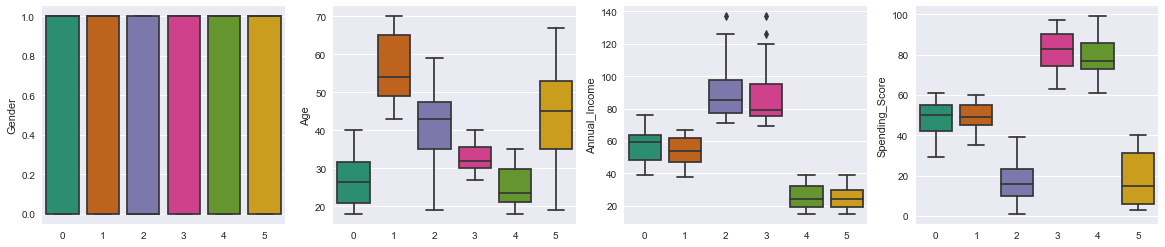

In [196]:
f, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 4))
for i in range(4):
    sns.boxplot(x = best_kmeans.labels_, y=dat.columns[i], data = dat, ax = axes[i], palette = 'Dark2')
plt.show()

Cluster|Note|Summary
:-|:-|:-
0|20-30세 이며, 연봉은 50,000-60,000 달러이며, 소비점수는 40-55점인 고객들 | 중위소득이며 소비력도 중간이며 연령대가 낮음
1|50-65세 이며, 연봉은 50,000-60,000 달러이며, 소비점수는 40-55점인 고객들 | 중위소득이며 소비력도 중간이며 연령대가 높음.
2|35-50세 이며, 연봉은 80,000-100,000 달러이며, 소비점수는 25점 이하인 고객들 | 저소득이며 소비력이 낮음
3|30-35세 이며, 연봉은 80,000-100,000 달러이며, 소비점수는 75점 이상인 고객들 | 고소득이며 소비력이 높음
4|20-30세 이며, 연봉은 20,000-30,000 달러이며, 소비점수는 75-85점인 고객들 | 저소득이며 소비력이 높음
5|35-55세 이며, 연봉은 20,000-30,000 달러이며, 소비점수는 30점 이하인 고객들 | 저소득이며 소비력이 낮으며 대부분의 연령대를 포함함

정리하자면, 클러스터를 결정짓는 요인으로는 나이, 연봉, 소비점수가 영향을 미친다. 이 세개의 feature들의 조합을 통해 cluster를 구성할 수 있다.

### (2) DBSCAN

In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dat)
scaled_dat = scaler.transform(dat)
pd.DataFrame(scaled_dat, columns = dat.columns)

,Gender,Age,Annual_Income,Spending_Score
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0.886405,-0.276302,2.268791,1.118061
196,0.886405,0.441365,2.497807,-0.861839
197,-1.128152,-0.491602,2.497807,0.923953
198,-1.128152,-0.491602,2.917671,-1.250054


In [221]:
from sklearn.cluster import DBSCAN
from itertools import product

eps_values = np.arange(0.05,15,0.1)
min_samples = np.arange(3, 10) 
DBSCAN_params = list(product(eps_values, min_samples))

K = []
sil_score = []
params = []
for p in DBSCAN_params:
    model = DBSCAN(eps=p[0], min_samples=p[1])
    pred = model.fit_predict(dat)
    if (len(np.unique(pred)) <= 3):
        continue
    K.append(len(np.unique(pred)))
    sil_score.append(silhouette_score(dat, pred))
    params.append(p)

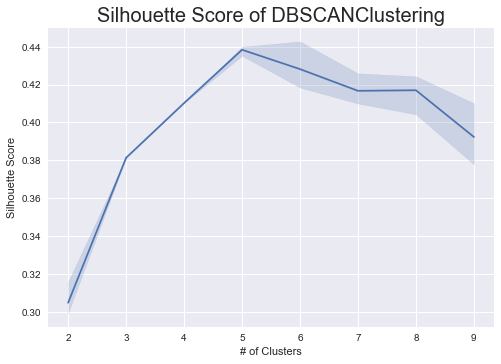

The Global Max Silhouette Score is 0.443. with DBSCAN(eps=3.85, min_samples=3), # of cluster is 6.


In [236]:
sns.lineplot(x=K, y= sil_score)
plt.xlabel('# of Clusters')
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score of DBSCANClustering", size = 20)
plt.show()

index = np.argmax(sil_score)
print("The Global Max Silhouette Score is %.3f. with DBSCAN(eps=%.2f, min_samples=%d), # of cluster is %d."%(sil_score[index], params[index][0],params[index][1], K[index]))

Silhouette Score가 가장 높은 경우를 탐색한 결과, `DBSCAN(eps=14.45, min_samples=6)`이고, 클러스터는 5개로 나타났다.

In [223]:
best_DBSCAN =  DBSCAN(eps=14.45, min_samples=6)
pred = best_DBSCAN.fit_predict(dat)

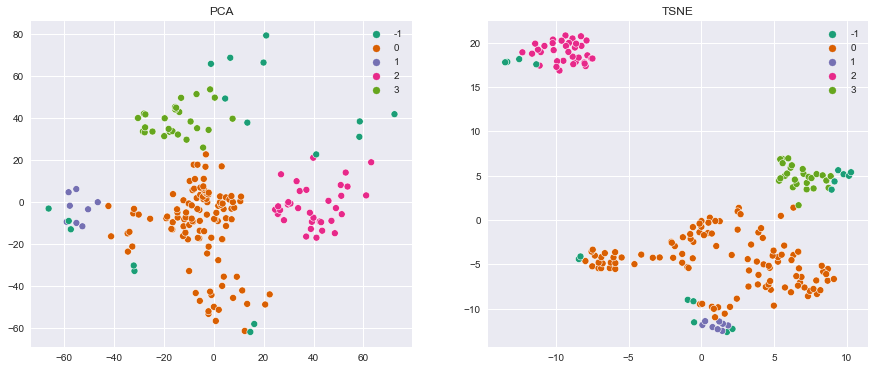

In [224]:
from sklearn.decomposition import PCA as PCA
from sklearn.manifold import TSNE
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

pca = PCA(n_components=2)
pca.fit(dat)
Xpca = pca.transform(dat)
sns.scatterplot(Xpca[:,0],Xpca[:,1], ax = axes[0], hue =pred, palette = 'Dark2')
axes[0].set_title('PCA')

tsn = TSNE()
res_tsne = tsn.fit_transform(dat)
sns.scatterplot(res_tsne[:,0],res_tsne[:,1], ax = axes[1], hue = pred, palette = 'Dark2')
axes[1].set_title('TSNE')

plt.show()

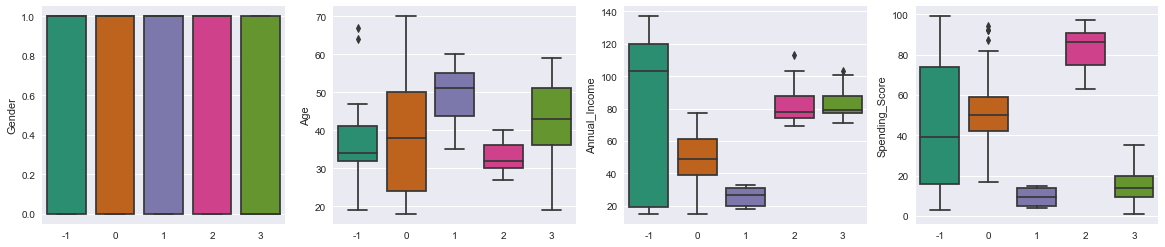

In [225]:
f, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 4))
for i in range(4):
    sns.boxplot(x = best_DBSCAN.labels_, y=dat.columns[i], data = dat, ax = axes[i], palette = 'Dark2')
plt.show()

나쁘지 않은 클러스터링 성능을 보여주나, K means를 사용했을 때 보다는 성능이 떨어져 보인다.

Cluster|Note|Summary
:-|:-|:-
-1|30-40세인 고객들 | 30대인 일반 고객
0|25-50세 이며, 연봉은 40,000-60,000 달러이며, 소비점수는 40-60점인 고객들 | 중위소득이며 소비력도 중간임
1|45-55세 이며, 연봉은 20,000-30,000 달러이며, 소비점수는 20점 이하 고객들 | 저소득이며 소비력이 낮음
2|30-35세 이며, 연봉은 80,000-100,000 달러이며, 소비점수는 75점 이상인 고객들 | 고소득이며 소비력이 높음
3|35-50세 이며, 연봉은 80,000-100,000 달러이며, 소비점수는 20점 이하인 고객들 | 고소득이며 소비력이 낮음

- K means와 비교하여 전반적으로 두개의 feature를 사용하여 클러스터를 이루는 것으로 추정된다.
- DBSCAN은 밀도를 기준으로 클러스터를 형성하기 때문에 t-SNE 시각화에서 볼 수 있듯이 오른쪽 아래 클러스터는 밀도가 확연히 차이나지 않기 때문에 성능이 떨어지는 것으로 추정된다.


### (3) Agglomerative Hierarchical Clustering

* ‘ward’ minimizes the variance of the clusters being merged.
* ‘average’ uses the average of the distances of each observation of the two sets.
* ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

In [232]:
from sklearn.cluster import AgglomerativeClustering
from itertools import product

K = np.arange(2, 10)
linkage = ['ward', 'average', 'complete']
Hier_params = list(product(K, linkage))
sil_score = []
K = []
for p in Hier_params:
    model = AgglomerativeClustering(n_clusters=p[0], affinity='euclidean', linkage=p[1])
    pred = model.fit_predict(dat)
    sil_score.append(silhouette_score(dat, pred))
    K.append(p[0])

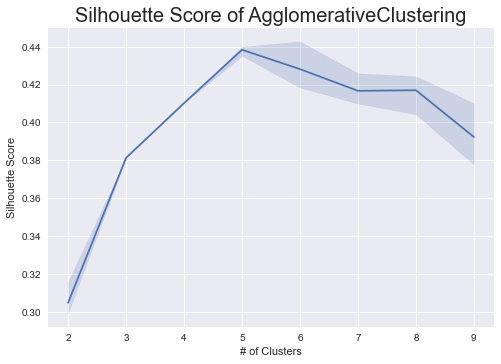

The Global Max Silhouette Score is 0.443. with AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward').


In [241]:
sns.lineplot(K, sil_score)
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Score of AgglomerativeClustering", size = 20)
plt.show()

index = np.argmax(sil_score)
print("The Global Max Silhouette Score is %.3f. with AgglomerativeClustering(n_clusters=%d, affinity='euclidean', linkage='%s')."%(sil_score[index], Hier_params[index][0], Hier_params[index][1]))

In [264]:
best_Agg =  AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
pred = best_Agg.fit_predict(dat)

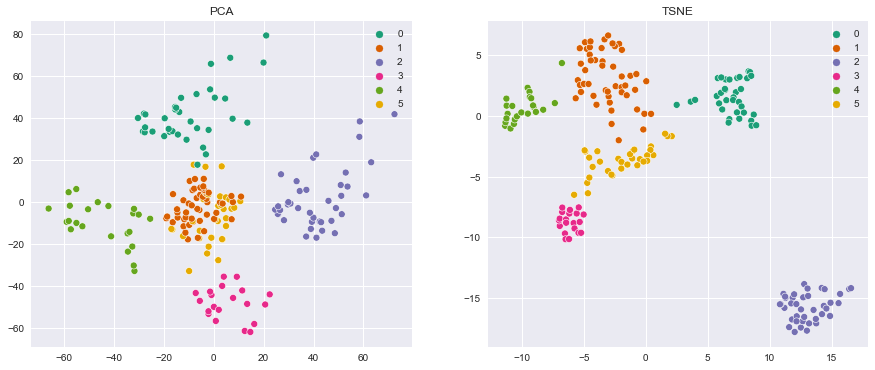

In [243]:
from sklearn.decomposition import PCA as PCA
from sklearn.manifold import TSNE
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

pca = PCA(n_components=2)
pca.fit(dat)
Xpca = pca.transform(dat)
sns.scatterplot(Xpca[:,0],Xpca[:,1], ax = axes[0], hue =pred, palette = 'Dark2')
axes[0].set_title('PCA')

tsn = TSNE()
res_tsne = tsn.fit_transform(dat)
sns.scatterplot(res_tsne[:,0],res_tsne[:,1], ax = axes[1], hue = pred, palette = 'Dark2')
axes[1].set_title('TSNE')

plt.show()

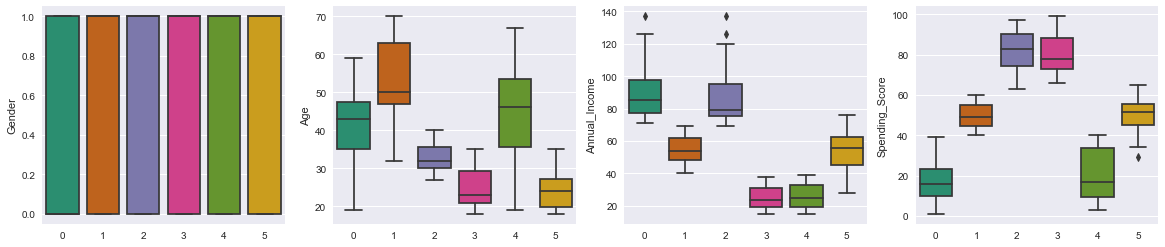

In [245]:
f, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 4))
for i in range(4):
    sns.boxplot(x =best_Agg.labels_, y=dat.columns[i], data = dat, ax = axes[i], palette = 'Dark2')
plt.show()

Cluster|Note|Summary
:-|:-|:-
0|35-50세 이며, 연봉은 80,000-100,000 달러이며, 소비점수는 25점 이하인 고객들 | 저소득이며 소비력이 낮음
1|50-65세 이며, 연봉은 50,000-60,000 달러이며, 소비점수는 40-55점인 고객들 | 중위소득이며 소비력도 중간이며 연령대가 높음.
2|30-35세 이며, 연봉은 80,000-100,000 달러이며, 소비점수는 75점 이상인 고객들 | 고소득이며 소비력이 높음
3|20-30세 이며, 연봉은 20,000-30,000 달러이며, 소비점수는 75-85점인 고객들 | 저소득이며 소비력이 높음
4|35-55세 이며, 연봉은 20,000-30,000 달러이며, 소비점수는 35점 이하인 고객들 | 저소득이며 소비력이 낮은 편이며 대부분의 연령대를 포함함
5|20-30세 이며, 연봉은 50,000-60,000 달러이며, 소비점수는 40-55점인 고객들 | 중위소득이며 소비력도 중간이며 연령대가 낮음

- K means와 비슷한 성능을 보이며, 군집 기준 및 구성도 유사하다. (순서만 다르다)
- ward는 SSE를 기반으로 클러스터링을 하기 때문에 노이즈에 유리하다.


### (4) Gaussian Mixture

가우시안 혼합모델은 데이터셋이 K개의 가우시안 분포의 가중합으로 이뤄졌다고 가정하는 모델이다. 이 분포들의 parameter를 찾고, 각각의 분포들을 클러스터로 묶는다.

In [312]:
from sklearn.mixture import GaussianMixture
from itertools import product

n_comp = np.arange(1,10)
cova_type = ['full', 'spherical', 'diag', 'tied']
gmm_params = list(product(n_comp, cova_type))
aic, bic =[],[]
for i in gmm_params:
    GMM = GaussianMixture(n_components = i[0], covariance_type = i[1], random_state = 0).fit(dat)
    bic.append(GMM.bic(dat))
    aic.append(GMM.aic(dat))

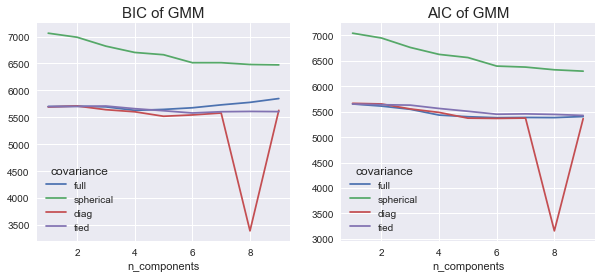

In [315]:
gmm_df = pd.DataFrame(gmm_params, columns = ['n_components', 'covariance'])

f, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
sns.lineplot('n_components', bic, data = gmm_df, hue = 'covariance', ax = axes[0])
axes[0].set_title("BIC of GMM", size = 15)
sns.lineplot('n_components', aic, data = gmm_df, hue = 'covariance', ax = axes[1])
axes[1].set_title("AIC of GMM", size = 15)
plt.show()

Criterion|Definition|Note
:-|:-|:-
AIC (Akaike Information Criterion)|$-2\log(likelihood) + 2p$|AIC는 실제 데이터의 분포와, 모형이 예측하는 분포 사이의 차이를 의미한다.
BIC (Bayesian Information Criterion)|$-2\log(likelihood) + p\log(n)$|BIC가 표본 크기가 커질수록 복잡한 모형을 더 강하게 패널티를 부여한다.

p: 변수의 갯수, n: 데이터 갯수

예측을 잘하고 싶을 떄는 AIC를 주로, 실제 데이터의 분포를 잘 알고 싶을 떄는 BIC를 주로 사용한다.

현재 AIC, BIC를 통해서 `GaussianMixture(n_components = 8, covariance_type = 'diag')`이 최적이라 판단된다.

In [282]:
best_gmm = GaussianMixture(n_components = 8, covariance_type = 'diag', random_state=0).fit(dat)
pred = best_gmm.predict(dat)
silhouette_score(dat, pred)

-0.13129547399809485

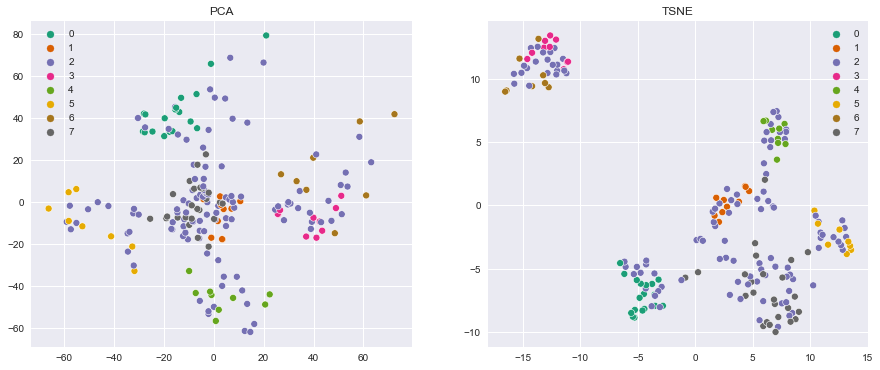

In [279]:
from sklearn.decomposition import PCA as PCA
from sklearn.manifold import TSNE
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

pca = PCA(n_components=2)
pca.fit(dat)
Xpca = pca.transform(dat)
sns.scatterplot(Xpca[:,0],Xpca[:,1], ax = axes[0], hue =pred, palette = 'Dark2')
axes[0].set_title('PCA')

tsn = TSNE()
res_tsne = tsn.fit_transform(dat)
sns.scatterplot(res_tsne[:,0],res_tsne[:,1], ax = axes[1], hue = pred, palette = 'Dark2')
axes[1].set_title('TSNE')

plt.show()

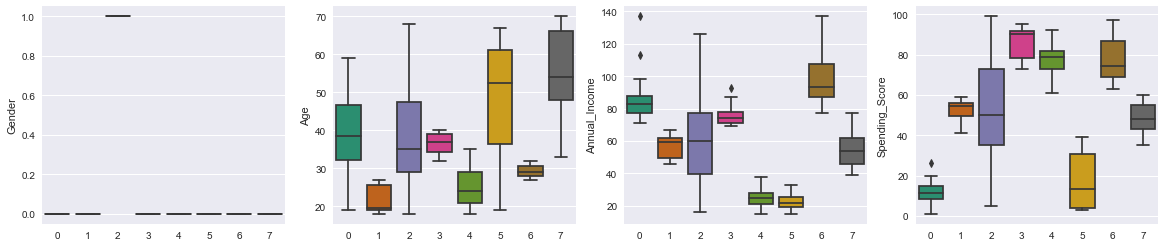

In [280]:
f, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 4))
for i in range(4):
    sns.boxplot(x =pred, y=dat.columns[i], data = dat, ax = axes[i], palette = 'Dark2')
plt.show()

Cluster|Note|Summary
:-|:-|:-
0|32-47세 이며, 연봉은 80,000-90,000 달러이며, 소비점수는 20점 이하인 남성 고객들 | 중고위 소득이며 소비력이 낮은 남성
1|26세 미만이며, 연봉은 50,000-60,000 달러이며, 소비점수는 50-60점인 남성 고객들 | 중위소득이며 소비력도 중간인 젊은 남성
2|30-50세 이며, 연봉은 40,000-80,000 달러이며, 소비점수는 40-70점인 여성 고객들 | 여성
3|35-40세 이며, 연봉은 70,000-80,000 달러이며, 소비점수는 80점 이상인 남성 고객들 | 중위소득의 소비력 높은 중년 남성
4|30세 이하이며, 연봉은 30,000 달러 이하이며, 소비점수는 75-80점인 남성 고객들 | 저소득이며 소비력이 높은 젊은 남성
5|35-60세 이며, 연봉은 30,000 달러 이하이며, 소비점수는 30점 이하인 남성 고객들 | 저소득이며 소비력이 중간 이하인 남성
6|28-32세 이며, 연봉은 85,000-11,000 달러이며, 소비점수는 70-90점인 남성 고객들 | 고소득이며 소비력이 높은 젊은 남성
7|45세 이상이며, 연봉은 45,000-60,000 달러이며, 소비점수는 40-60점인 남성 고객들 | 중위소득이며 소비력이 중간인 장년 남성

* 앞선 모델들과는 달리 성별까지 고려하여 클러스터링된 것을 확인할 수 있었다.
* 또한, 이전 모델들보다 훨씬 세분화된 기준이 적용된 것을 확인할 수 있었다.

## 3. Summary

In [288]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

DIAMETER_METHODS = ['mean_cluster', 'farthest']
CLUSTER_DISTANCE_METHODS = ['nearest', 'farthest']

def inter_cluster_distances(labels, distances, method='nearest'):
    """Calculates the distances between the two nearest points of each cluster.
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: `nearest` for the distances between the two nearest points in each cluster, or `farthest`
    """
    if method not in CLUSTER_DISTANCE_METHODS:
        raise ValueError(
            'method must be one of {}'.format(CLUSTER_DISTANCE_METHODS))

    if method == 'nearest':
        return __cluster_distances_by_points(labels, distances)
    elif method == 'farthest':
        return __cluster_distances_by_points(labels, distances, farthest=True)


def __cluster_distances_by_points(labels, distances, farthest=False):
    n_unique_labels = len(np.unique(labels))
    cluster_distances = np.full((n_unique_labels, n_unique_labels),
                                float('inf') if not farthest else 0)

    np.fill_diagonal(cluster_distances, 0)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i, len(labels)):
            if labels[i] != labels[ii] and (
                (not farthest and
                 distances[i, ii] < cluster_distances[labels[i], labels[ii]])
                    or
                (farthest and
                 distances[i, ii] > cluster_distances[labels[i], labels[ii]])):
                cluster_distances[labels[i], labels[ii]] = cluster_distances[
                    labels[ii], labels[i]] = distances[i, ii]
    return cluster_distances


def diameter(labels, distances, method='farthest'):
    """Calculates cluster diameters
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: either `mean_cluster` for the mean distance between all elements in each cluster, or `farthest` for the distance between the two points furthest from each other
    """
    if method not in DIAMETER_METHODS:
        raise ValueError('method must be one of {}'.format(DIAMETER_METHODS))

    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    if method == 'mean_cluster':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii]:
                    diameters[labels[i]] += distances[i, ii]

        for i in range(len(diameters)):
            diameters[i] /= sum(labels == i)

    elif method == 'farthest':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii] and distances[i, ii] > diameters[
                        labels[i]]:
                    diameters[labels[i]] = distances[i, ii]
    return diameters


def dunn(labels, distances, diameter_method='farthest',
         cdist_method='nearest'):
    """
    Dunn index for cluster validation (larger is better).
    
    where :math:`d(c_i,c_j)` represents the distance between
    clusters :math:`c_i` and :math:`c_j`, and :math:`diam(c_k)` is the diameter of cluster :math:`c_k`.
    Inter-cluster distance can be defined in many ways, such as the distance between cluster centroids or between their closest elements. Cluster diameter can be defined as the mean distance between all elements in the cluster, between all elements to the cluster centroid, or as the distance between the two furthest elements.
    The higher the value of the resulting Dunn index, the better the clustering
    result is considered, since higher values indicate that clusters are
    compact (small :math:`diam(c_k)`) and far apart (large :math:`d \left( c_i,c_j \right)`).
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param diameter_method: see :py:function:`diameter` `method` parameter
    :param cdist_method: see :py:function:`diameter` `method` parameter
    
    .. [Kovacs2005] Kovács, F., Legány, C., & Babos, A. (2005). Cluster validity measurement techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence.
    """

    labels = LabelEncoder().fit(labels).transform(labels)

    ic_distances = inter_cluster_distances(labels, distances, cdist_method)
    min_distance = min(ic_distances[ic_distances.nonzero()])
    max_diameter = max(diameter(labels, distances, diameter_method))

    return min_distance / max_diameter

Dunn's Index에 대한 라이브러리는 존재하지 않아 외부 코드를 검색하여 사용하였습니다. 본 코드의 출처는 https://douglasrizzo.com.br/dunn-index/ 입니다.

$D = \min_{i = 1 \ldots n_c; j = i + 1\ldots n_c} \left\lbrace \frac{d \left( c_i,c_j \right)}{\max_{k = 1 \ldots n_c} \left(diam \left(c_k \right) \right)} \right\rbrace$

In [311]:
from sklearn.metrics import pairwise_distances

model = [best_kmeans, best_DBSCAN, best_Agg, best_gmm]
summary = pd.DataFrame(columns = ['Clustering Method', '# of Clusters', 'Silhouette Coefficient', "Dunn's Index"])

for i in range(len(model)):
    m = model[i]
    if(i <=2):
        pred = m.fit_predict(dat)
    else:
        pred = m.predict(dat)
    dist = pairwise_distances(dat)
    summary = summary.append(pd.DataFrame([[str(m).split('(')[0], len(np.unique(pred)), silhouette_score(dat, pred), dunn(pred, dist, diameter_method='farthest',
         cdist_method='nearest')]], columns=summary.columns), ignore_index=True)
summary

,Clustering Method,# of Clusters,Silhouette Coefficient,Dunn's Index
0,KMeans,6,0.452055,0.098686
1,DBSCAN,5,0.295873,0.032003
2,AgglomerativeClustering,6,0.442801,0.090448
3,GaussianMixture,8,-0.131295,0.017033


* Silhouette Coefficient는 클러스터 안의 데이터가 자신이 속한 클러스터 안의 다른 데이터와 얼마나 유사하며, 다른 클러스터에 속한 데이터와 얼마나 차이가 나는지를 측정한다. 이 값은 -1~1 사이의 값을 가지며, 1에 가까울수록 적절한 클러스터링 이뤄졌다고 판단한다.
    - Silhouette Coefficient를 기반으로 보았을 때는 Kmeans와 AgglomerativeClustering의 성능이 가장 뛰어난 것으로 나타난다.
* Dunn's Index는 클러스터 간의 거리 중 최솟값을 클러스터 내 객체간의 거리 중 최댓값으로 나눈다. 즉, 클러스터간의 거리는 클수록 클러스터 내의 거리는 작아야 좋은 모델이므로 DI가 클수록 적절한 클러스터링이 이뤄졌다고 판단한다.
    - DI를 기반으로 보았을 때도  Kmeans와 AgglomerativeClustering의 성능이 가장 뛰어난 것으로 나타난다.


**두개의 metric을 통해 클러스터링의 성능을 평가한 결과, K means가 가장 좋은 방법임을 알 수 있다!**